Questions: 
- over/undersampling before or after finding best k?
- How much should i write about K-nearest neighbour, or the sklearn implementation of it (its parameters?)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA


In [7]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('train_dataset.csv')
df.describe()

,Elevation (meters),Aspect (azimuth),Slope (degrees),Horizontal_Distance_To_Hydrology (meters),Vertical_Distance_To_Hydrology (meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am (0-255),Hillshade_Noon (0-255),Hillshade_3pm (0-255),Horizontal_Distance_To_Fire_Points (meters),Rawah Wilderness Area (1/4),Neota Wilderness Area (2/4),Comanche Peak Wilderness Area (3/4),Cache la Poudre Wilderness Area (4/4),2702 (1/40),2703 (2/40),2704 (3/40),2705 (4/40),2706 (5/40),2717 (6/40),3501 (7/40),3502 (8/40),4201 (9/40),4703 (10/40),4704 (11/40),4744 (12/40),4758 (13/40),5101 (14/40),5151 (15/40),6101 (16/40),6102 (17/40),6731 (18/40),7101 (19/40),7102 (20/40),7103 (21/40),7201 (22/40),7202 (23/40),7700 (24/40),7701 (25/40),7702 (26/40),7709 (27/40),7710 (28/40),7745 (29/40),7746 (30/40),7755 (31/40),7756 (32/40),7757 (33/40),7790 (34/40),8703 (35/40),8707 (36/40),8708 (37/40),8771 (38/40),8772 (39/40),8776 (40/40),Forest Cover Type Classes
count,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.00000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000,570030.000000
mean,2959.376992,155.664193,14.102505,269.423532,46.414373,2350.233337,212.145284,223.320850,142.532181,1980.442696,0.448980,0.051490,0.435886,0.063644,0.005205,0.012920,0.008300,0.021320,0.002744,0.011342,0.000177,0.000311,0.001982,0.056171,0.021339,0.051604,0.029997,0.001028,0.000005,0.004889,0.005872,0.003277,0.006912,0.015906,0.001451,0.057464,0.099526,0.03654,0.000818,0.004459,0.001868,0.001621,0.198323,0.051957,0.044133,0.090395,0.077692,0.002777,0.003261,0.000203,0.000514,0.026809,0.023802,0.015085,2.051580
std,280.001323,111.915804,7.487624,212.560695,58.269857,1559.225890,26.766332,19.763991,38.273231,1324.328424,0.497391,0.220996,0.495873,0.244118,0.071958,0.112931,0.090723,0.144449,0.052309,0.105891,0.013310,0.017619,0.044479,0.230251,0.144513,0.221227,0.170578,0.032046,0.002294,0.069752,0.076401,0.057151,0.082850,0.125113,0.038062,0.232727,0.299368,0.18763,0.028580,0.066630,0.043184,0.040229,0.398737,0.221940,0.205390,0.286747,0.267687,0.052625,0.057014,0.014264,0.022666,0.161525,0.152433,0.121892,1.396556
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

##### Helper functions (courtesy of Gabriel Atkin) #####

In [8]:
# Use inverse_transform() before evaluating your model's performance (?)
def split_and_scale(df):
    df = df.copy()

    # Split the data into X and y
    y = df[' Forest Cover Type Classes'].copy()
    X = df.drop(' Forest Cover Type Classes', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

    # Scale the data, gives each column in X a mean of 0 and a variance of 1
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_test, y_test):
    acc = model.score(X_test, y_test)
    print(f'Model accuracy: {acc:.2f}')

    predictions = model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("classification report: \n", report)

#### evaluate model ####

*Imbalanced data*
Model accuracy: 0.93


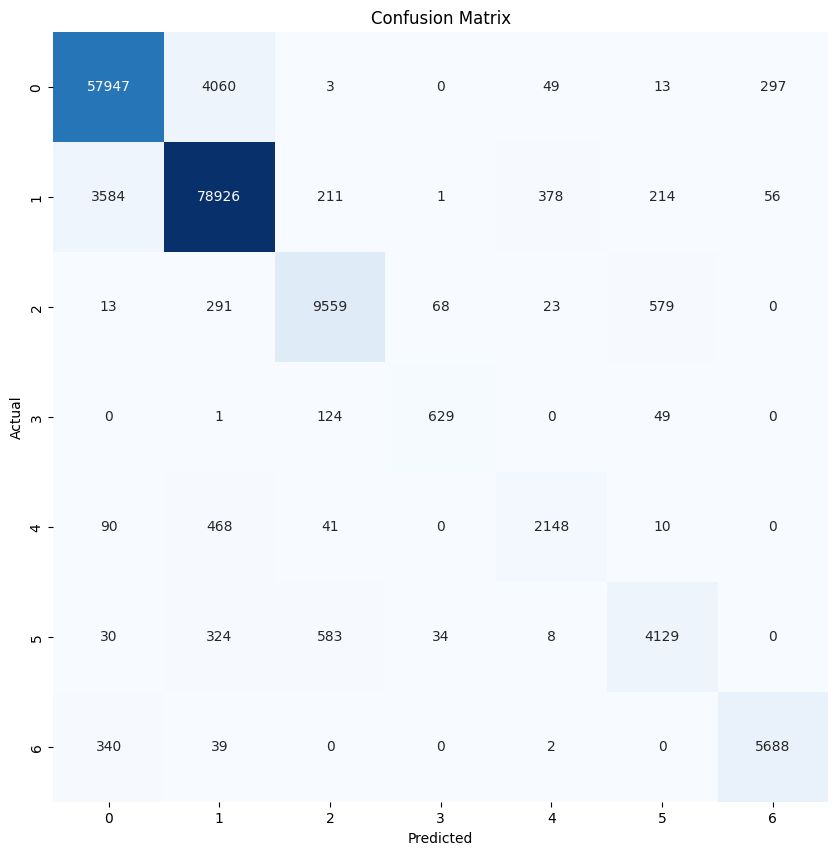

classification report: 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93     62369
           2       0.94      0.95      0.94     83370
           3       0.91      0.91      0.91     10533
           4       0.86      0.78      0.82       803
           5       0.82      0.78      0.80      2757
           6       0.83      0.81      0.82      5108
           7       0.94      0.94      0.94      6069

    accuracy                           0.93    171009
   macro avg       0.89      0.87      0.88    171009
weighted avg       0.93      0.93      0.93    171009



In [4]:


X_train, X_test, y_train, y_test = split_and_scale(df)
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X_train, y_train)
print("*Imbalanced data*")
evaluate_model(model, X_test, y_test)

#### Undersampling vs Oversampling ####

Class distribution: 
  Forest Cover Type Classes
2    278006
1    207785
3     35067
7     20132
6     17036
5      9308
4      2696
Name: count, dtype: int64


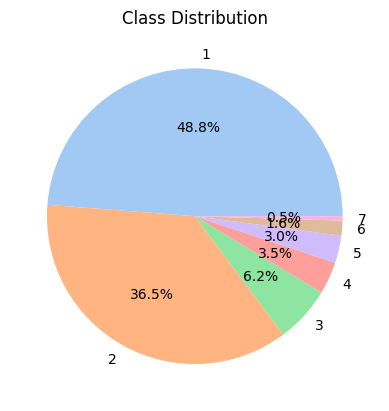

In [7]:
#Class distribution
print("Class distribution: \n", df[' Forest Cover Type Classes'].value_counts())
plt.pie(
    df[' Forest Cover Type Classes'].value_counts(),
    labels=[1,2,3,4,5,6,7],
    colors=sns.color_palette('pastel'),
    autopct='%.1f%%'
)
plt.title('Class Distribution')
plt.show()

In [9]:

X_train, X_test, y_train, y_test = split_and_scale(df)
k = {'n_neighbors': np.concatenate([np.arange(1, 20+1)]).tolist()}

best_param_kNN = GridSearchCV(KNeighborsClassifier(), k, scoring='accuracy')
best_param_kNN.fit(X_train, y_train)
optimal_k = best_param_kNN.best_params_['n_neighbors']
print("\n")
print("--------------------------------------------------------------------")
print("The optimal value for k using GridSearchCV method is {0}".format(optimal_k))



--------------------------------------------------------------------
The optimal value for k using GridSearchCV method is 1


#### TODO: Testing different k values (gridsearch) ####

In [5]:
K = [1, 3, 5, 7, 9, 11, 13, 15, 17]
acc = []

X_train, X_test, y_train, y_test = split_and_scale(df)
for k in K:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    score = model.score(X_test, y_test)
    acc.append(score)

    match = np.sum(predictions == y_test)
    #...

